In [114]:
from dolfin import *
import matplotlib.pyplot as plt
import matplotlib as m

# Constants
ys = 1
t = 0
dt = 0.01
T = 1
rho1 = 1
rho2 = 10
mu1 = 1
mu2 = 0
lamda1 = 1
lamda2 = 1

# Mesh, functionspace, functions
mesh = RectangleMesh(Point(0.0, 0.0), Point(2.0, 2.0), 100,100)
V = VectorFunctionSpace(mesh, "CG", 2)
D = VectorFunctionSpace(mesh, "DG", 0)
u = TrialFunction(V)
v = TestFunction(V)

# Define Subdomains
#cf = CellFunction("size_t", mesh, 0)
#domain1 = AutoSubDomain(lambda x: x[1] > ys)
#domain1.mark(cf,1)

# Define variable constants
#rhof = Expression(("x[1] > ys ? rho1 : rho2",
#                   "x[1] > ys ? rho1 : rho2"),
#                  ys=ys,rho1=rho1,rho2=rho2)
rhof = Expression(("x[1] > ys ? rho1 : rho2", "x[1] > ys ? rho1 : rho2"),
                  degree=0, ys=ys,rho1=rho1,rho2=rho2)
muf = Expression(("x[1] > ys ? mu1 : mu2", "x[1] > ys ? mu1 : mu2"),
                 degree=0, ys=ys,mu1=mu1,mu2=mu2)
lamdaf = Expression(("x[1] > ys ? lamda1 : lamda2", "x[1] > ys ? lamda1 : lamda2"),
                    degree=0, ys=ys,lamda1=lamda1,lamda2=lamda2)
stepf = Expression(("x[1] > ys ? pow(dt,2)/rho1 : pow(dt,2)/rho2",
                    "x[1] > ys ? pow(dt,2)/rho1 : pow(dt,2)/rho2"),
                   degree=0, ys=ys,dt=dt,rho1=rho1,rho2=rho2)

rho = interpolate(rhof, D)
mu = interpolate(muf, D)
lamda = interpolate(lamdaf, D)
step = interpolate(stepf, D)

# Stress tensor
def sigma(u, lamda, mu):
    return lamda*div(u)*Identity(2) + mu*(grad(u) + grad(u).T)

# Initial conditions
Ixy = Constant((1.0,0.0))
Vxy = Constant((0.0,0.0))
u2 = interpolate(Ixy, V)
u1 = interpolate(Vxy, V)

# Variational forms
F = inner(u,v)*dx - 2*inner(u1,v)*dx + inner(u2,v)*dx + step*inner(sigma(u1,lamda,mu),grad(v))*dx

t = 2*dt
left = assemble(lhs(F))
u = Function(V)

e_x_full = interpolate(e_x, V)
e_y_full = interpolate(e_y, V)

N = len(u.vector()[:])

def plot_comp(fnc, i, W, the_title, the_min, the_max):
    cdict = {
        'red'  :  ( (0.0, 0.25, .25), (0.02, .59, .59), (1., 1., 1.)),
        'green':  ( (0.0, 0.0, 0.0), (0.02, .45, .45), (1., .97, .97)),
        'blue' :  ( (0.0, 1.0, 1.0), (0.02, .75, .75), (1., 0.45, 0.45))
    }
    cm = m.colors.LinearSegmentedColormap('my_colormap', cdict, 1024)
    
    f = fnc
    if i == 0:
        e_x = interpolate(Expression(('1.0', '0.0'), degree=1), W)
        f = dot(fnc, e_x)
    elif i == 1:
        e_y = interpolate(Expression(('0.0', '1.0'), degree=1), W)
        f = dot(fnc, e_y)
    c = plot(f, cmap=cm, vmin=the_min, vmax=the_max)
    plt.colorbar(c)
    plt.title(the_title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
# Time stepping
while t < T + DOLFIN_EPS:
    print('(min,max) = (%s,%s)'%(min(tmp), max(tmp)))
    input('Press enter to continue')
    u = interpolate(Expression(('sin(x[0] * x[1])', 'cos(x[0] * x[1])'), degree=1), V)
    plot_comp(u, 0, V, 'X component of vector field', -1.0, 1.0)
    plot_comp(u, 1, V, 'Y component of vector field', -1.0, 1.0)
    right = assemble(rhs(F))
    print("solving at time step t=%g" % t)
    solve(left, u.vector(), right)
    t = t + dt

    u2.assign(u1)
    u1.assign(u)
    
    


Invalid ranks 1 and 2 in product.


UFLException: Invalid ranks 1 and 2 in product.

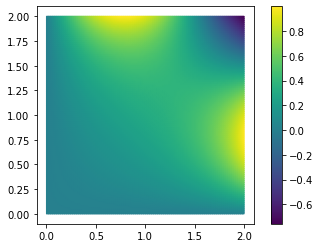

In [11]:
mesh = RectangleMesh(Point(0.0, 0.0), Point(2.0, 2.0), 100,100)
V = FunctionSpace(mesh, 'Lagrange', 1)
u0 = Function(V)
u1 = Function(V)
u = as_vector([u0, u1])

uu = TrialFunction(V)
vv = TestFunction(V)

def boundary(x, on_boundary):
    return on_boundary

rhsArray = list(range(1
                     
                     
                     
                     
                     ))
for x in rhsArray:
    rhs = Constant(x)
    A = assemble(inner( grad(uu), grad(vv) ) * dx)
    b = assemble(rhs * vv * dx)
    bc = DirichletBC(V, Expression('sin(x[0]*x[1])', degree=1), boundary)
    bc.apply(A,b)
    u = Function(V)
    solve(A, u.vector(), b)
    plt.figure()
    c = plot(u, mode='color')
    plt.colorbar(c)
    plt.show()

In [39]:
import numpy as np
x = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
x.reshape(9,1)
x.reshape(3,3)


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

ValueError: input operand has more dimensions than allowed by the axis remapping

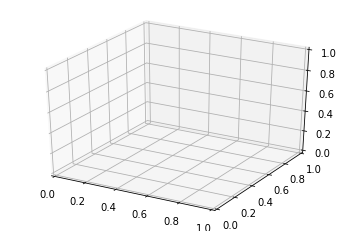

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,1,1000)
y = np.linspace(0,1,1000)
X,Y = np.meshgrid(x,y)

Z = np.sqrt(X ** 2 + Y ** 2)

plt.plot(X,Y,Z)

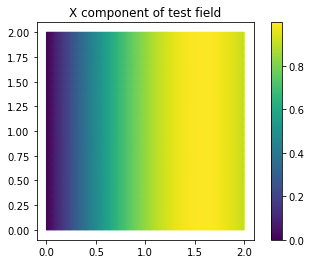

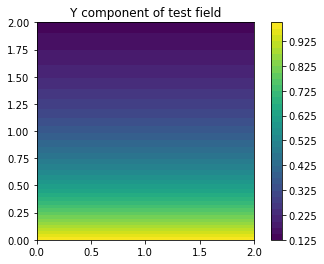

Text(0.5, 1.0, 'Full test vector field')

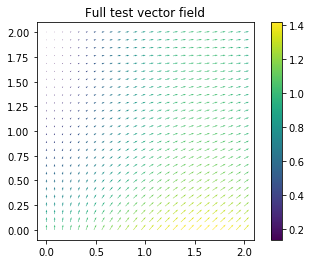

In [73]:
W = VectorFunctionSpace(mesh, "Lagrange", 1)
f = interpolate(Expression(('sin(x[0])', 'exp(-x[1])'), degree=1), W)
e_x = interpolate(Expression(('1.0', '0.0'), degree=1), W)
e_y = interpolate(Expression(('0.0', '1.0'), degree=1), W)

c = plot(dot(f,e_x), mode='color')
plt.colorbar(c)
plt.title("X component of test field")
plt.show()

c = plot(dot(f,e_y))
plt.colorbar(c)
plt.title('Y component of test field')
plt.show()

c = plot(f)
plt.colorbar(c)
plt.title('Full test vector field')